<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Regresión lineal simple</center>


#### Acerca de este cuaderno
En este cuaderno aprenderemos a usar scikit-learn para implementar regresión lineal simple. Descargaremos un conjunto de datos relacionado con el consumo de combustible y las emisiones de dióxido de carbono de vehículos. Luego dividiremos nuestros datos en conjuntos de entrenamiento y de prueba, usaremos el conjunto de entrenamiento para crear un modelo, evaluaremos el modelo con el conjunto de prueba y, por último, emplearemos el modelo para predecir un valor desconocido.


### Importación de los paquetes necesarios

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Descarga de datos
Usaremos !wget para descargar los datos de IBM Object Storage.

In [3]:
!certutil.exe -f -urlcache -split https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv data.csv

****  Online  ****
CertUtil: -URLCache command completed successfully.


__¿Sabía usted?__ Que al usar aprendizaje automático, es probable que trabaje con grandes conjuntos de datos. Como empresa, ¿dónde puede alojar sus datos? IBM ofrece una oportunidad inigualable para empresas, con 10 TB de almacenamiento en IBM Cloud Object Storage: [Regístrese ahora gratis](http://cocl.us/ML0101EN-IBM-Offer-CC)


## Explicación de los datos

### `FuelConsumption.csv`:
Hemos descargado un conjunto de datos sobre consumo de combustible, **`FuelConsumption.csv`**, que contiene calificaciones de consumo de combustible y emisiones de dióxido de carbono específicas por modelo de vehículos ligeros que se venden al público en Canadá. [Fuente del conjunto de datos](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- Año del modelo **[MODELYEAR]** e.g. 2014
- Marca **[MAKE]** e.g. Acura
- Modelo **[MODEL]** e.g. ILX
- Clase de vehículo **[VEHICLE CLASS]** e.g. SUV
- Tamaño del motor **[ENGINE SIZE]** e.g. 4.7
- Cilindros **[CYLINDERS]** e.g 6
- Transmisión **[TRANSMISSION]** e.g. A6
- Consumo de combustible en la ciudad en l/100 km **[FUEL CONSUMPTION in CITY(L/100 km)]** e.g. 9.9
- Consumo de combustible en la carretera en l/100 km**[FUEL CONSUMPTION in HWY (L/100 km)]** e.g. 8.9
- Consumo de combustible combinado en l/100 km **[FUEL CONSUMPTION COMB (L/100 km)]** e.g. 9.2
- Emisiones de dióxido de carbono en g/km **[CO2 EMISSIONS (g/km)]** e.g. 182   --> low --> 0


## Lectura de los datos

In [4]:
df = pd.read_csv("data.csv")

# demos una mirada al conjunto de datos
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Exploración de los datos
Primero realicemos una exploración descriptiva de nuestros datos.

In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Seleccionemos algunas características para analizarlas más detalladamente.

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Podemos representar cada una de estas características en forma gráfica:

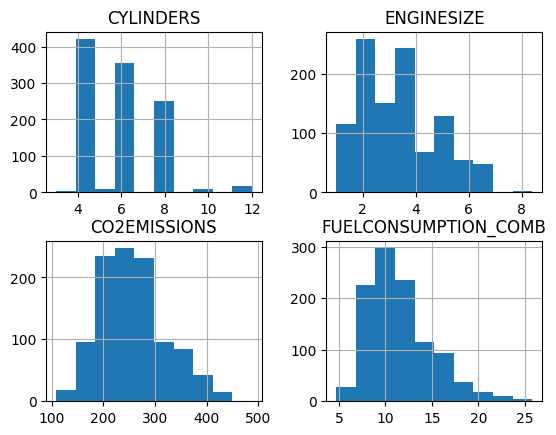

In [10]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Ahora hagamos un gráfico de cada una de estas características en comparación con las emisiones, para ver qué grado de linealidad presenta su relación.

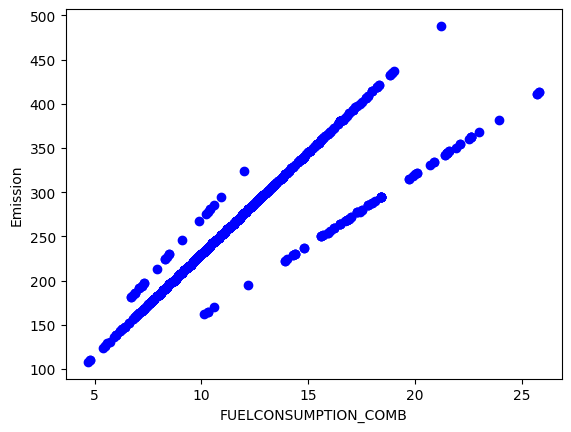

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

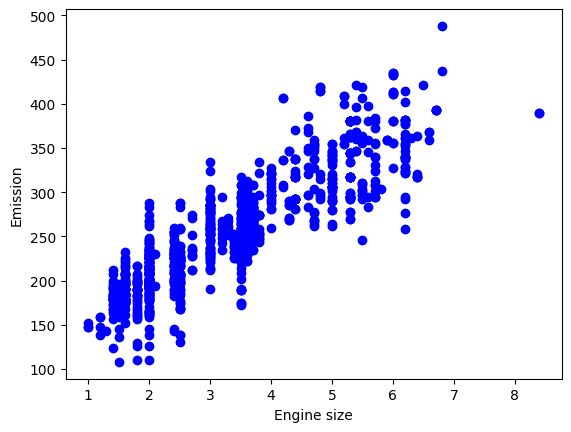

In [12]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Práctica
Haga un gráfico de cilindros __[CYLINDER]__ vs. emisiones para ver qué tan lineal es la relación entre ellos.

In [21]:
cdf[['CYLINDERS','CO2EMISSIONS']]

,CYLINDERS,CO2EMISSIONS
0,4,196
1,4,221
2,4,136
3,6,255
4,6,244
...,...,...
1062,6,271
1063,6,264
1064,6,271
1065,6,260


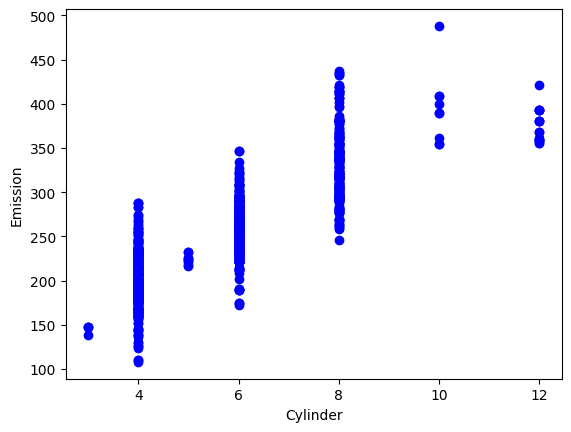

In [13]:
# escriba su código aquí
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

Haga doble clic __aquí__ para ver la solución.

<!-- Su respuesta está abajo:
    
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

-->

#### Creación de los conjuntos de datos de entrenamiento y de prueba
Este enfoque implica dividir el conjunto de datos en conjuntos de entrenamiento y prueba, respectivamente, que son mutuamente excluyentes. Después de ello, se entrena con el conjunto de entrenamiento y se realizan pruebas con el conjunto de prueba. Esto permite proporcionar una evaluación más exacta de la exactitud fuera de la muestra porque el conjunto de datos de prueba no forma parte del conjunto de datos que se han empleado para entrenar los datos. Es más realista para casos verdaderos.

Esto significa que sabemos el resultado de cada punto de este conjunto de datos, ¡y eso lo hace ideal para usarlo como conjunto de prueba! Y como no se han utilizado estos datos para entrenar el modelo, este no conoce el resultado correspondiente a estos puntos. Por lo tanto, en esencia, es una verdadera prueba fuera de la muestra.

In [41]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [42]:
msk

array([ True,  True,  True, ..., False,  True,  True])

### Modelo de regresión simple
La regresión lineal ajusta un modelo lineal con coeficientes B = (B1, …, Bn) para minimizar la “suma de cuadrados residual” entre la variable independiente x del conjunto de datos y la variable dependiente y de la aproximación lineal.

#### Distribución de los datos de entrenamiento

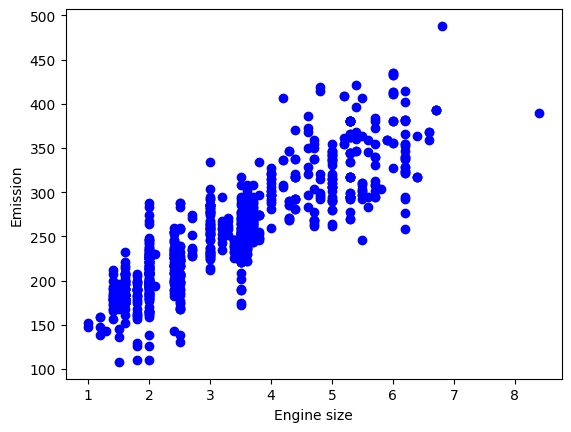

In [43]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modelado
Uso del paquete sklearn para modelar datos.

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.78085647]]
Intercept:  [125.8479821]


Como mencionamos antes, __Coefficient (coeficiente)__ e __Intercept (ordenada al origen)__ en la regresión lineal simple son los parámetros de la recta de ajuste. Como se trata de una regresión lineal simple con solo dos parámetros, y sabiendo que los parámetros son la ordenada al origen y la pendiente de la recta, sklearn puede estimarlos directamente a partir de nuestros datos. Observe que todos los datos deben estar disponibles para recorrerlos y calcular los parámetros.

#### Representación gráfica de lo obtenido

Podemos graficar la recta de ajuste sobre los datos:

Text(0, 0.5, 'Emission')

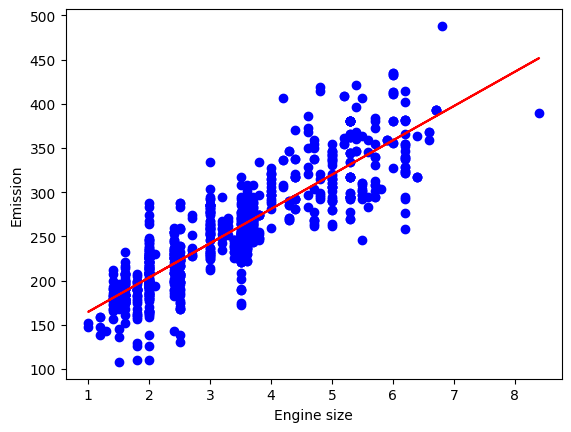

In [45]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluación
Comparamos los valores reales con los predichos para calcular la exactitud del modelo de regresión. Las métricas de evaluación desempeñan un papel clave en el desarrollo de modelos, ya que dan indicaciones de aspectos que es necesario mejorar.
Hay diferentes métricas de evaluación de modelos. Utilicemos aquí el ECM para calcular la exactitud de nuestro modelo sobre la base del conjunto de prueba:
- Error absoluto medio: es la media del valor absoluto de los errores. Se trata de la métrica más fácil de entender, puesto que es simplemente el error promedio.
- Error cuadrático medio (ECM): es la media de los cuadrados de los errores. Se utiliza más que el error absoluto medio porque da más importancia a los errores grandes. Esto se debe a que el término cuadrático aumenta los errores de manera exponencial, y dicho aumento es mayor en los errores grandes que en los pequeños.
- Raíz cuadrada del error cuadrático medio (RECM).
- El R cuadrado no mide el error, pero es una métrica de exactitud de modelos muy utilizada. Representa qué tan cerca están los datos de la recta de regresión ajustada. Cuanto mayor es el R cuadrado, mejor se ajusta el modelo a los datos. El mejor valor posible es 1.0 y puede ser negativo (porque el modelo puede ser arbitrariamente peor).

In [46]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.43
Residual sum of squares (MSE): 1050.08
R2-score: 0.64


## ¿Desea saber más?

IBM SPSS Modeler es una plataforma de análisis completa que tiene muchos algoritmos de aprendizaje automático. Ha sido diseñada para aportar inteligencia predictiva a las decisiones que toman personas, grupos, sistemas, su empresa como conjunto. Este curso le permite acceder a una evaluación gratuita, disponible en este enlace: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

También puede usar Watson Studio para ejecutar estos cuadernos más rápido con conjuntos de datos más grandes. Watson Studio es la solución de IBM en la nube número uno para científicos de datos, construida por científicos de datos. Con los cuadernos Jupyter, RStudio, Apache Spark y otras bibliotecas populares preempaquetadas en la nube, Watson Studio hace posible que los científicos de datos colaboren en sus proyectos sin necesidad de instalar nada. Súmese hoy mismo a la comunidad de usuarios de Watson Studio, que crece cada día más, con una cuenta gratuita en [Watson Studio](https://cocl.us/ML0101EN_DSX)

### ¡Gracias por completar esta lección!

Cuaderno creado por: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). Este cuaderno y su código fuente se difunden de conformidad con los términos de la [licensia de MIT](https://bigdatauniversity.com/mit-license/).​